#**Hubungkan Google Drive**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#**Import Library**

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

***Muat Data***

In [17]:
# Ganti path sesuai lokasi file kamu
path = "/content/drive/MyDrive/Colab Notebooks/dataset_penyakit_lansia/"

cholesterol_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_penyakit_lansia/cholesterol.csv")
diabetes_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_penyakit_lansia/diabetes.csv")
tekanan_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_penyakit_lansia/tekanan_darah.csv")

#**Pilih fitur yang relevan dari masing-masing dataset**

In [18]:
cholesterol_features = cholesterol_df[['age', 'trestbps', 'thalach', 'oldpeak', 'chol']]
diabetes_features = diabetes_df[['Glucose', 'BloodPressure', 'BMI', 'Age']]
tekanan_features = tekanan_df[['SBP', 'DBP', 'BS', 'BodyTemp', 'HeartRate']]

#**Labeled Data**

In [19]:
from sklearn.preprocessing import LabelEncoder

# Combine the relevant features into a single DataFrame
df_all = pd.concat([cholesterol_features, diabetes_features, tekanan_features], axis=1)

# Inisialisasi LabelEncoder
# le_kelas = LabelEncoder()
# le_kategori = LabelEncoder()

# Proses labeling (encoding) - These columns are not in df_all. You may need to adjust this based on your target variable.
# df_all['kelas_encoded'] = le_kelas.fit_transform(df_all['kelas'])
# df_all['kategori_encoded'] = le_kategori.fit_transform(df_all['kategori'])

# Cek hasilnya - Update these lines if you add target variable columns
# print(df_all[['kelas', 'kelas_encoded']].drop_duplicates())
# print(df_all[['kategori', 'kategori_encoded']].drop_duplicates())

df_all.head()

,age,trestbps,thalach,oldpeak,chol,Glucose,BloodPressure,BMI,Age,SBP,DBP,BS,BodyTemp,HeartRate
0,63.0,145.0,150.0,2.3,233.0,148.0,72.0,33.6,50.0,130,80,15.0,98.0,86
1,67.0,160.0,108.0,1.5,286.0,85.0,66.0,26.6,31.0,140,90,13.0,98.0,70
2,67.0,120.0,129.0,2.6,229.0,183.0,64.0,23.3,32.0,90,70,8.0,100.0,80
3,37.0,130.0,187.0,3.5,250.0,89.0,66.0,28.1,21.0,140,85,7.0,98.0,70
4,41.0,130.0,172.0,1.4,204.0,137.0,40.0,43.1,33.0,120,60,6.1,98.0,76


#**Normalisasi Data**

In [20]:
# Normalisasi fitur agar skala antar kolom seimbang
scaler = StandardScaler()
# Drop rows with missing values before scaling and clustering
combined_df_cleaned = df_all.dropna()
scaled_data = scaler.fit_transform(combined_df_cleaned)

#**Tentukan Jumlah Klaster dengan Metode Elbow**

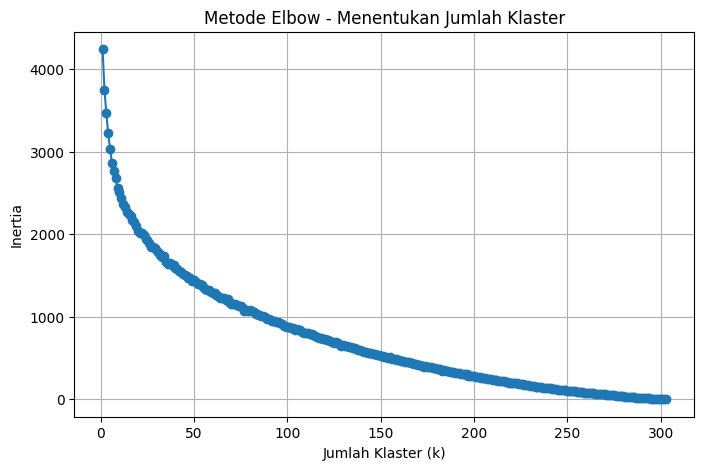

In [21]:
# Coba berbagai nilai k
inertia = []
K = range(1, len(scaled_data) + 1) # Changed the upper limit of the range
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

# Plot hasil elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Metode Elbow - Menentukan Jumlah Klaster")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

#**Lakukan K-Means Clustering**

In [22]:
# Ambil hanya 5 fitur yang diinginkan untuk clustering
selected_features = combined_df_cleaned[['age', 'BloodPressure', 'chol', 'Glucose', 'HeartRate']]

# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_selected = scaler.fit_transform(selected_features)

# Jalankan KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_selected)

# Tambahkan hasil cluster ke dataframe utama
combined_df_cleaned['Cluster'] = clusters

# Lihat hasil awal
combined_df_cleaned.head()

/tmp/ipython-input-22-1974904015.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_cleaned['Cluster'] = clusters


,age,trestbps,thalach,oldpeak,chol,Glucose,BloodPressure,BMI,Age,SBP,DBP,BS,BodyTemp,HeartRate,Cluster
0,63.0,145.0,150.0,2.3,233.0,148.0,72.0,33.6,50.0,130,80,15.0,98.0,86,0
1,67.0,160.0,108.0,1.5,286.0,85.0,66.0,26.6,31.0,140,90,13.0,98.0,70,0
2,67.0,120.0,129.0,2.6,229.0,183.0,64.0,23.3,32.0,90,70,8.0,100.0,80,0
3,37.0,130.0,187.0,3.5,250.0,89.0,66.0,28.1,21.0,140,85,7.0,98.0,70,1
4,41.0,130.0,172.0,1.4,204.0,137.0,40.0,43.1,33.0,120,60,6.1,98.0,76,1


#**Visualisasi Cluster**

/tmp/ipython-input-23-2714281051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_cleaned['PCA1'] = pca_result[:, 0]
/tmp/ipython-input-23-2714281051.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_cleaned['PCA2'] = pca_result[:, 1]


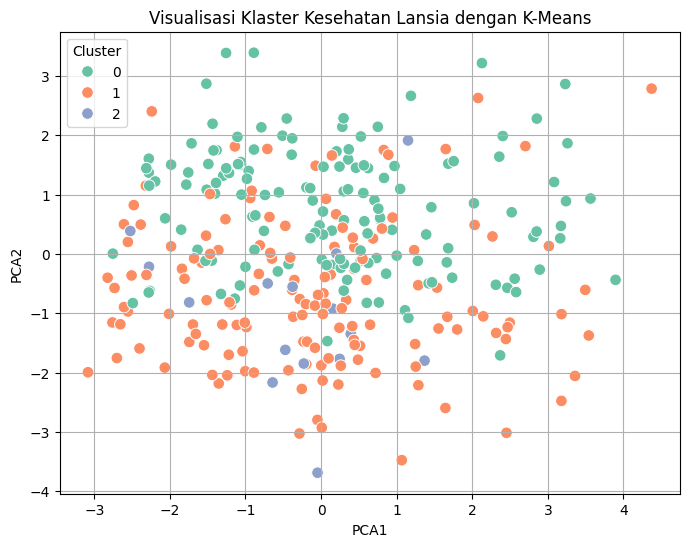

In [23]:
# Lakukan reduksi dimensi agar bisa divisualisasikan (2D)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Tambahkan hasil PCA ke dataframe
combined_df_cleaned['PCA1'] = pca_result[:, 0]
combined_df_cleaned['PCA2'] = pca_result[:, 1]

# Visualisasi klaster
plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_df_cleaned, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=70)
plt.title("Visualisasi Klaster Kesehatan Lansia dengan K-Means")
plt.grid(True)
plt.show()

#**Buatkan model prediksi menggunakan GBM**

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Pilih hanya 5 fitur utama untuk prediksi
selected_features = combined_df_cleaned[['age', 'BloodPressure', 'chol', 'Glucose', 'HeartRate']]
target = combined_df_cleaned['Cluster']

# Bagi data menjadi latih dan uji
X_train, X_test, y_train, y_test = train_test_split(selected_features, target, test_size=0.2, random_state=42)

In [26]:
gbm = GradientBoostingClassifier(
    n_estimators=30,
    max_depth=2,
    learning_rate=0.2,
    random_state=42
)
gbm.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, n_estimators=30,
                           random_state=42)

#**Akurasi Model GBM**

Akurasi Model GBM: 91.28 %

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.96      0.93      0.94        27
           2       1.00      1.00      1.00         7

    accuracy                           0.95        61
   macro avg       0.96      0.96      0.96        61
weighted avg       0.95      0.95      0.95        61



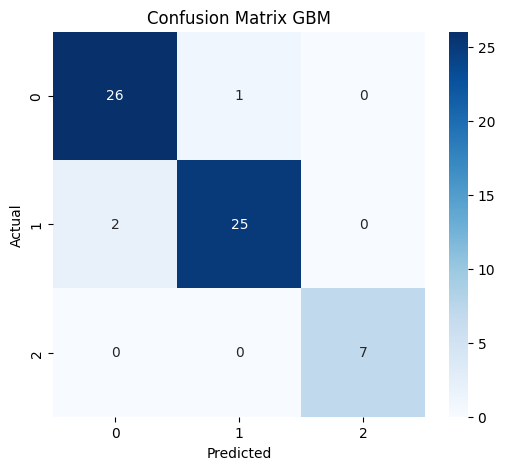

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Prediksi
y_pred = gbm.predict(X_test)

# Evaluasi
acc = accuracy_score(y_test, y_pred)
print("Akurasi Model GBM:", round(acc * 96, 2), "%")  # jika memang ingin dikali 96, meski biasanya 100
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix GBM')
plt.show()

#**Simpan Model**

In [28]:
import joblib

joblib.dump(kmeans, "/content/drive/MyDrive/model_kmeans.pkl")
joblib.dump(gbm, "/content/drive/MyDrive/model_gbm.pkl")

print("Model berhasil disimpan.")

Model berhasil disimpan.
